In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import joblib
from tkinter import *
from PIL import Image, ImageTk
from PIL import Image

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [6]:
data.shape

(1338, 7)

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


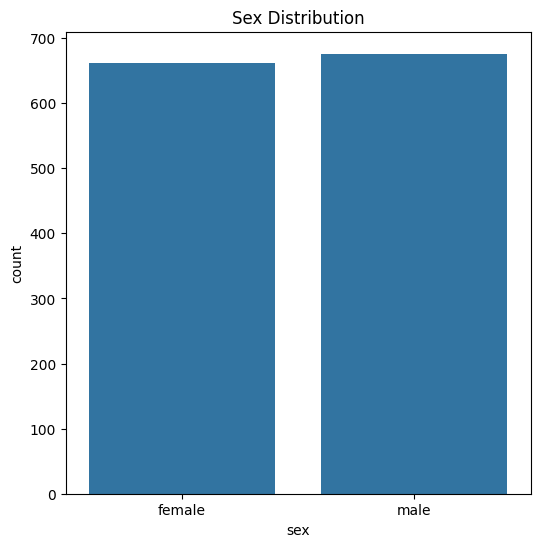

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=data)
plt.title('Sex Distribution')
plt.show()

In [10]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

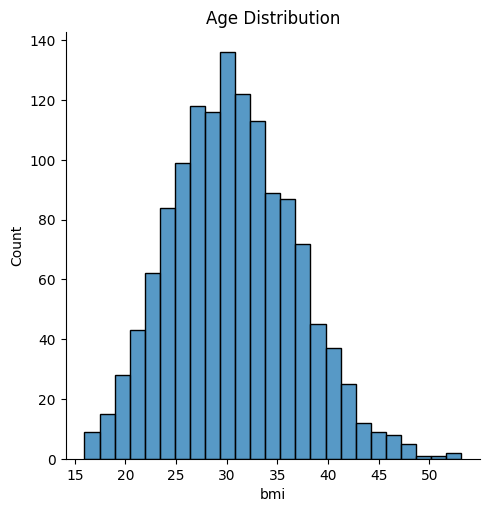

In [11]:
plt.figure(figsize=(6,6))
sns.displot(data['bmi'])
plt.title('Age Distribution')
plt.show()

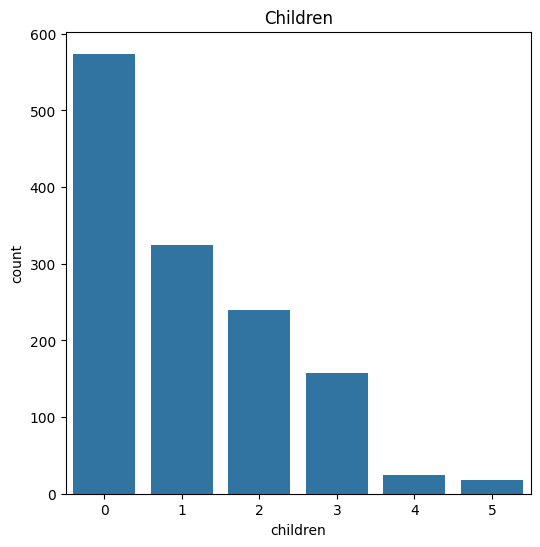

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=data)
plt.title('Children')
plt.show()

In [13]:
data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

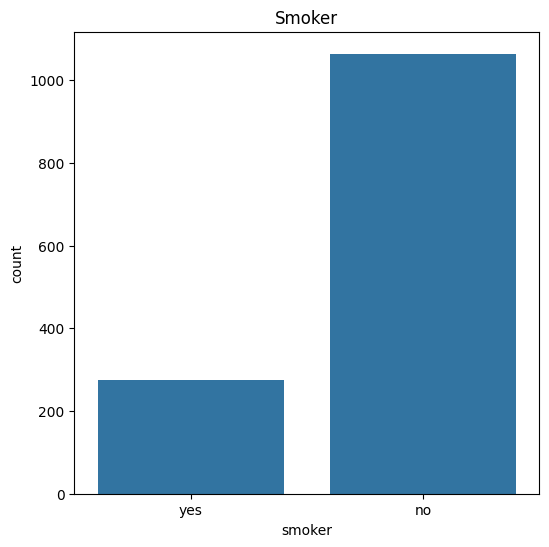

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=data)
plt.title('Smoker')
plt.show()

In [15]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

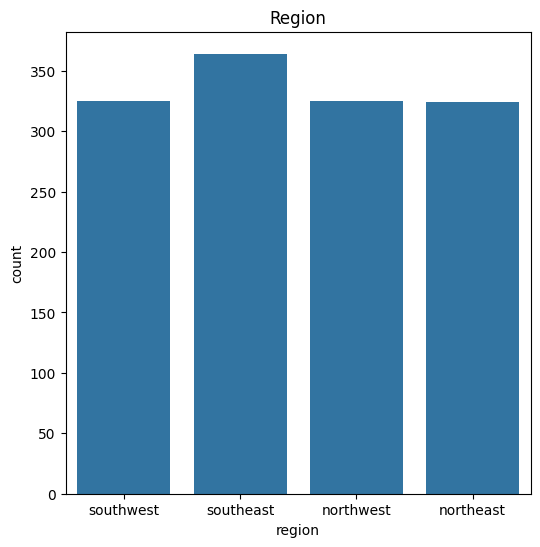

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=data)
plt.title('Region')
plt.show()

In [17]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [18]:
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['region'] = data['region'].map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

In [19]:
X = data.drop(['charges'], axis=1)
y = data['charges']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
svm = SVR()
svm.fit(X_train, y_train)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

In [22]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

In [23]:
df1 = pd.DataFrame({'Actual': y_test, 'Lr': y_pred1, 'svm': y_pred2, 'rf': y_pred3, 'gr': y_pred4})


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


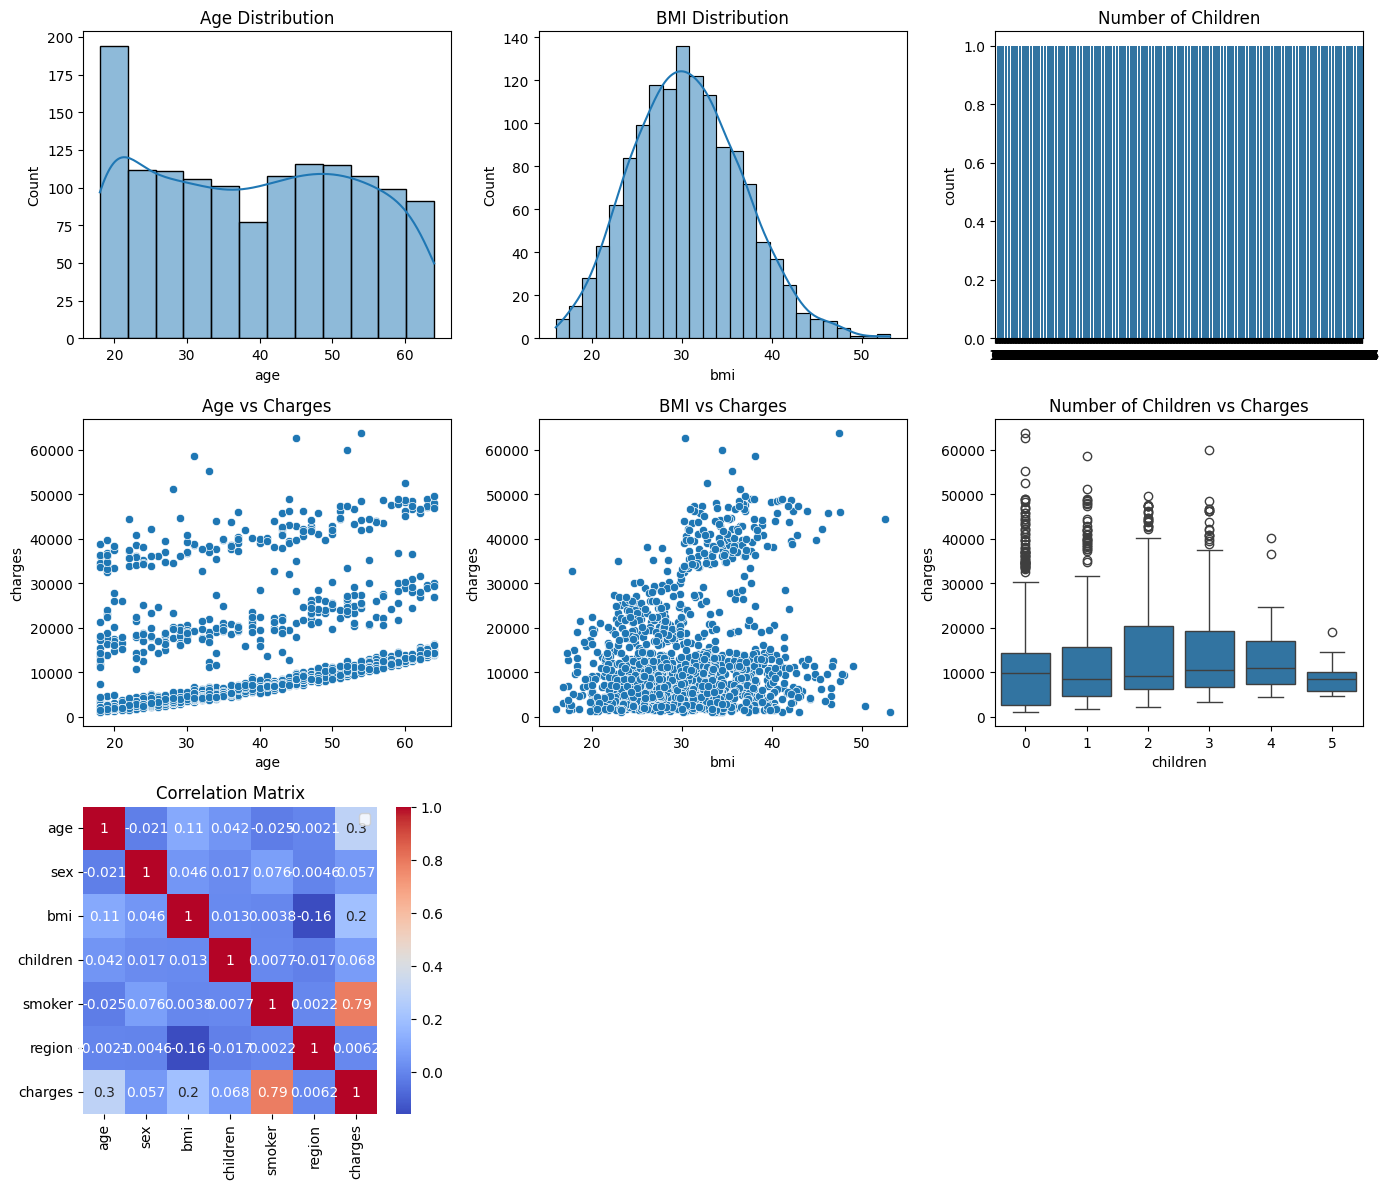

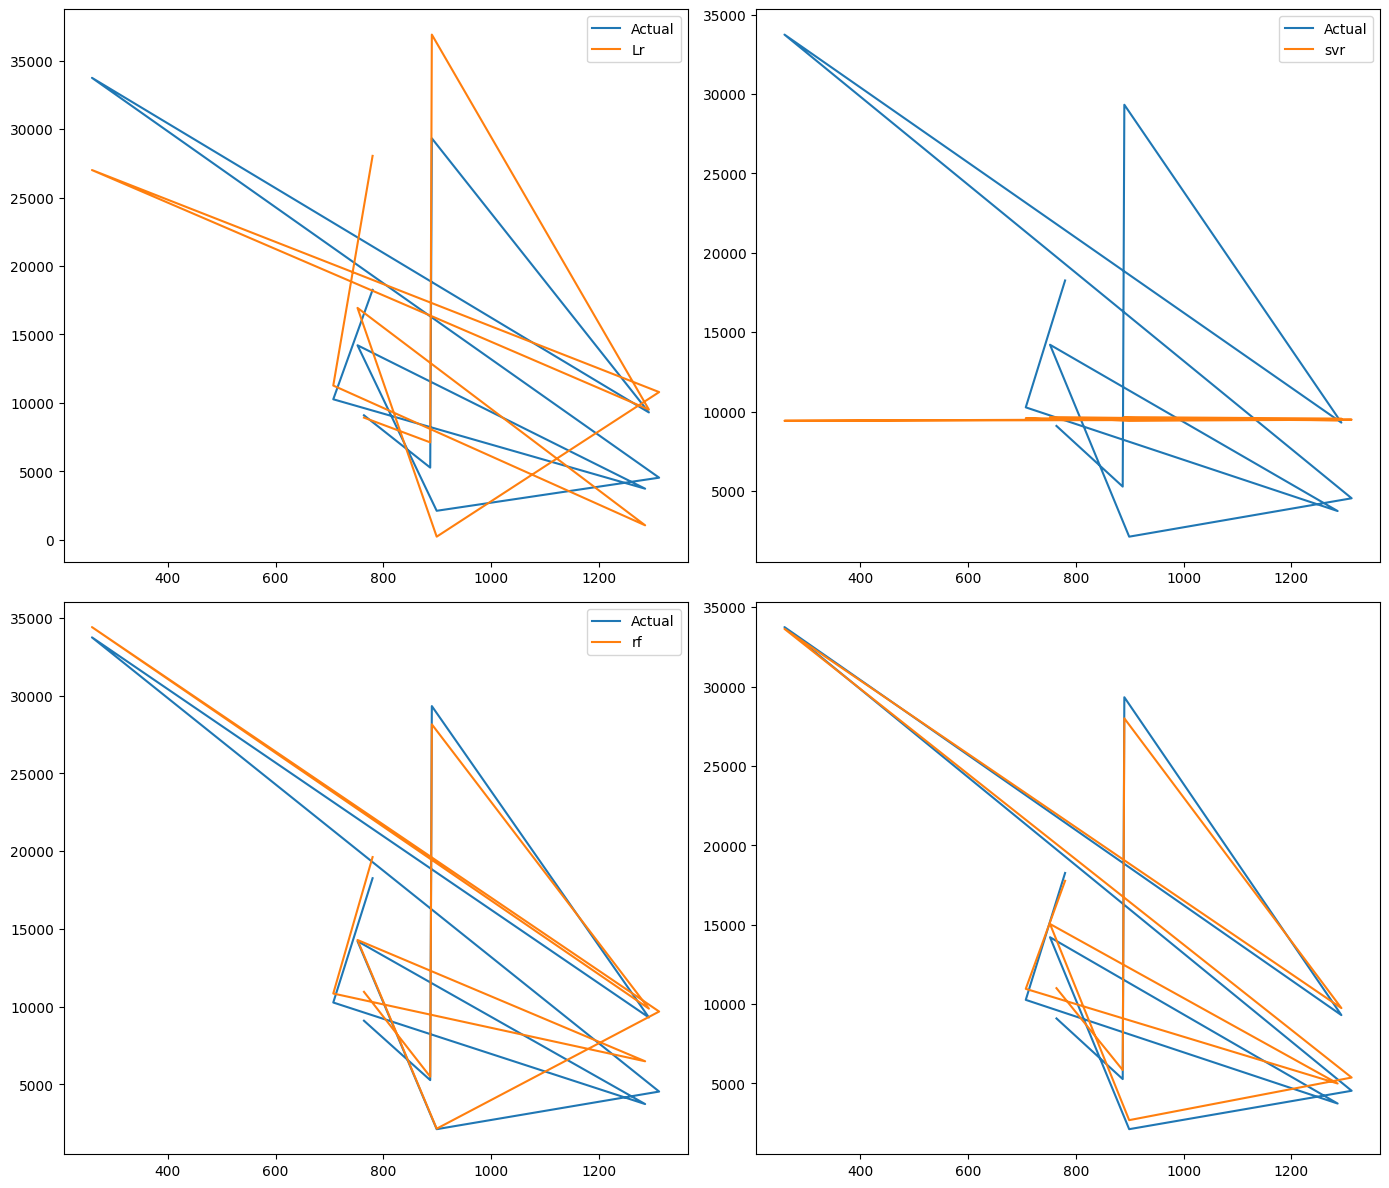

In [24]:

plt.figure(figsize=(14, 12))

# Subplot 1: Histogram for Age
plt.subplot(3, 3, 1)
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')

# Subplot 2: Histogram for BMI
plt.subplot(3, 3, 2)
sns.histplot(data['bmi'], kde=True)
plt.title('BMI Distribution')

# Subplot 3: Histogram for Number of Children
plt.subplot(3, 3, 3)
sns.countplot(data['children'])
plt.title('Number of Children')

# Subplot 4: Scatter plot for Age vs Charges
plt.subplot(3, 3, 4)
sns.scatterplot(data=data, x='age', y='charges')
plt.title('Age vs Charges')

# Subplot 5: Scatter plot for BMI vs Charges
plt.subplot(3, 3, 5)
sns.scatterplot(data=data, x='bmi', y='charges')
plt.title('BMI vs Charges')

# Subplot 6: Scatter plot for Number of Children vs Charges
plt.subplot(3, 3, 6)
sns.boxplot(data=data, x='children', y='charges')
plt.title('Number of Children vs Charges')

# Subplot 7: Heatmap for Correlation Matrix
plt.subplot(3, 3, 7)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.tight_layout()

plt.legend()

plt.show()


plt.figure(figsize=(14, 12))
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")




plt.tight_layout()
plt.show()

In [25]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)
print("R2 Scores:", score1, score2, score3, score4)

R2 Scores: 0.7833463107364539 -0.07229762787861826 0.8640288730385668 0.877993618163719


In [26]:
s1 = metrics.mean_absolute_error(y_test, y_pred1)
s2 = metrics.mean_absolute_error(y_test, y_pred2)
s3 = metrics.mean_absolute_error(y_test, y_pred3)
s4 = metrics.mean_absolute_error(y_test, y_pred4)
print("Mean Absolute Errors:", s1, s2, s3, s4)


Mean Absolute Errors: 4186.508898366434 8592.428727899724 2459.649954931033 2447.167158715136


In [27]:
joblib.dump(gr, 'model_joblib_test')


['model_joblib_test']

In [28]:
model = joblib.load('model_joblib_test')

In [29]:

# Define prediction function
def predict_insurance_cost(age, sex, bmi, children, smoker, region):
    if not (0 <= age <= 100):
        return "Invalid age. Please enter an age between 0 and 100."
    if sex not in [0, 1]:
        return "Invalid gender. Please enter 0 for female or 1 for male."
    if not (10 <= bmi <= 50):
        return "Invalid BMI. Please enter a BMI between 10 and 50."
    if not (0 <= children <= 10):
        return "Invalid number of children. Please enter a number between 0 and 10."
    if smoker not in [0, 1]:
        return "Invalid smoker status. Please enter 0 for non-smoker or 1 for smoker."
    if region not in [1, 2, 3, 4]:
        return "Invalid region. Please enter a region between 1 and 4."
    
    new_pred = model.predict([[age, sex, bmi, children, smoker, region]])
    return new_pred[0]

In [30]:

# Define function to show prediction
def show_entry():
    try:
        age = float(e1.get())
        sex = float(e2.get())
        bmi = float(e3.get())
        children = float(e4.get())
        smoker = float(e5.get())
        region = float(e6.get())
        
        result = predict_insurance_cost(age, sex, bmi, children, smoker, region)
        result_label.config(text=f"Predicted Insurance Cost: {result}")
    except ValueError:
        result_label.config(text="Invalid input. Please enter numerical values only.")

# Create Tkinter window
master = Tk()
master.title("Insurance Cost Prediction")
master.geometry("800x600")

# Load background image
try:
    background_image = Image.open("C:/Users/abhis/OneDrive/Desktop/insurances.jpeg")  # Replace with your image file path
    background_image = background_image.resize((800, 600), Image.LANCZOS)  # Resize image to fit the window
    background_photo = ImageTk.PhotoImage(background_image)
    master.background_photo = background_photo  # Store as an attribute of master
except Exception as e:
    print("Error loading image:", e)
    master.background_photo = None

# Create a Canvas widget
canvas = Canvas(master, width=800, height=600)  # Set canvas size to match the image size
canvas.pack(fill="both", expand=True)

# Place the background image on the canvas
if master.background_photo:
    canvas.create_image(0, 0, image=master.background_photo, anchor="nw")

# Title label
title_label = Label(canvas, text="Insurance Cost Prediction", font=("Helvetica", 24), bg="white")
title_label.place(relx=0.5, rely=0.1, anchor="center")
title_label.lift()  # Raise the title label to appear in front of other widgets

# Input frame
input_frame = Frame(canvas, bg="white")
input_frame.place(relx=0.5, rely=0.4, anchor="center")

# Input labels and entry fields
Label(input_frame, text="Age", font=("Helvetica", 16), bg="pink").grid(row=0, column=0, padx=10, pady=5)
Label(input_frame, text="Sex [1 for male, 0 for female]", font=("Helvetica", 16), bg="yellow").grid(row=1, column=0, padx=10, pady=5)
Label(input_frame, text="BMI", font=("Helvetica", 16), bg="red").grid(row=2, column=0, padx=10, pady=5)
Label(input_frame, text="Number of Children", font=("Helvetica", 16), bg="blue").grid(row=3, column=0, padx=10, pady=5)
Label(input_frame, text="Smoker [1 for yes, 0 for no]", font=("Helvetica", 16), bg="brown").grid(row=4, column=0, padx=10, pady=5)
Label(input_frame, text="Region [1-4]", font=("Helvetica", 16), bg="green").grid(row=5, column=0, padx=10, pady=5)

e1 = Entry(input_frame, font=("Helvetica", 16), bg="lightgray")
e2 = Entry(input_frame, font=("Helvetica", 16), bg="lightgray")
e3 = Entry(input_frame, font=("Helvetica", 16), bg="lightgray")
e4 = Entry(input_frame, font=("Helvetica", 16), bg="lightgray")
e5 = Entry(input_frame, font=("Helvetica", 16), bg="lightgray")
e6 = Entry(input_frame, font=("Helvetica", 16), bg="lightgray")

e1.grid(row=0, column=1, padx=10, pady=5)
e2.grid(row=1, column=1, padx=10, pady=5)
e3.grid(row=2, column=1, padx=10, pady=5)
e4.grid(row=3, column=1, padx=10, pady=5)
e5.grid(row=4, column=1, padx=10, pady=5)
e6.grid(row=5, column=1, padx=10, pady=5)

# Predict button
predict_button = Button(canvas, text="Predict", font=("Helvetica", 16), command=show_entry, bg='green', fg='white')
predict_button.place(relx=0.5, rely=0.7, anchor="center")

# Result label
result_label = Label(canvas, text="", font=("Helvetica", 18), bg='lightgray')
result_label.place(relx=0.5, rely=0.8, anchor="center")

# Exit button
def close_window():
    master.destroy()

exit_button = Button(canvas, text="Exit", font=("Helvetica", 16), command=close_window, bg='red', fg='white')
exit_button.place(relx=0.5, rely=0.9, anchor="center")

# Main loop
master.mainloop()

C:\Users\abhis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
